In [269]:
import cv2 

img = cv2.imread('./Tulipan.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

256 256 3 3


# Convolutional Neural Networks

# Importar Librerías

In [270]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [271]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [272]:
dirname = os.path.join(os.getcwd(),'E:\Datsets\Flores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  E:\Datsets\Flores\
E:\Datsets\Flores\astilbe 1
E:\Datsets\Flores\iris 7932
E:\Datsets\Flores\rose 10410
E:\Datsets\Flores\sunflower 11152
E:\Datsets\Flores\tulip 11640
Directorios leidos: 5
Imagenes en cada directorio [7933, 10410, 11152, 11640, 11335]
suma Total de imagenes en subdirs: 52470


# Creamos las etiquetas

In [273]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  52470


In [274]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 astilbe
1 iris
2 rose
3 sunflower
4 tulip


In [275]:
images_resized = [cv2.resize(img, (28, 28)) for img in images]
y = np.array(labels)
X = np.array(images_resized, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [276]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (41976, 28, 28, 3) (41976,)
Testing data shape :  (10494, 28, 28, 3) (10494,)


Text(0.5, 1.0, 'Ground Truth : 2')

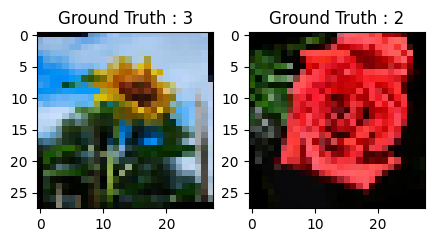

In [277]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

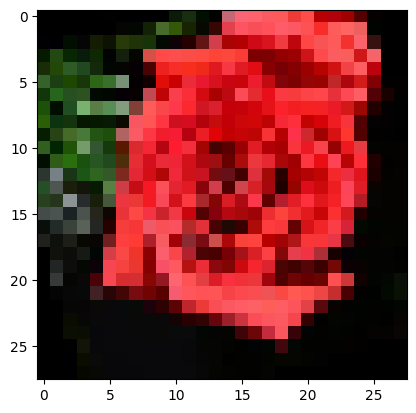

In [278]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [279]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0. 0. 0. 1. 0.]


# Creamos el Set de Entrenamiento y Validación

In [280]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [281]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(33580, 28, 28, 3) (8396, 28, 28, 3) (33580, 5) (8396, 5)


# Creamos el modelo de CNN

In [282]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 100 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [283]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

In [284]:
sport_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 flatten_11 (Flatten)        (None, 6272)              0         
                                                                 
 dense_22 (Dense)            (None, 32)                200736    
                                                     

In [285]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [286]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/100


1050/1050 [==============================] - 6s 5ms/step - loss: 1.5407 - accuracy: 0.3039 - val_loss: 1.3898 - val_accuracy: 0.4489
Epoch 2/100
1050/1050 [==============================] - 5s 5ms/step - loss: 1.3533 - accuracy: 0.4330 - val_loss: 1.1767 - val_accuracy: 0.5550
Epoch 3/100
1050/1050 [==============================] - 5s 5ms/step - loss: 1.2183 - accuracy: 0.5043 - val_loss: 1.0559 - val_accuracy: 0.6078
Epoch 4/100
1050/1050 [==============================] - 5s 5ms/step - loss: 1.1293 - accuracy: 0.5513 - val_loss: 0.9740 - val_accuracy: 0.6491
Epoch 5/100
1050/1050 [==============================] - 5s 5ms/step - loss: 1.0704 - accuracy: 0.5752 - val_loss: 0.9229 - val_accuracy: 0.6648
Epoch 6/100
1050/1050 [==============================] - 5s 5ms/step - loss: 1.0256 - accuracy: 0.6013 - val_loss: 0.8854 - val_accuracy: 0.6783
Epoch 7/100
1050/1050 [==============================] - 5s 5ms/step - loss: 0.9906 - accuracy: 0.6161 - val_loss: 0.8578 - val_accuracy: 0.68

In [287]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
sport_model.save("D:\IA\CNN\Flores.h5py")

INFO:tensorflow:Assets written to: D:\IA\CNN\Flores.h5py\assets


INFO:tensorflow:Assets written to: D:\IA\CNN\Flores.h5py\assets


# Evaluamos la red

In [288]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

328/328 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.8295


In [289]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.47905123233795166
Test accuracy: 0.829521656036377


In [290]:
sport_train.history

{'loss': [1.540741205215454,
  1.353299856185913,
  1.2183171510696411,
  1.1293160915374756,
  1.0704405307769775,
  1.0255542993545532,
  0.990605354309082,
  0.9629987478256226,
  0.9407908916473389,
  0.9167137145996094,
  0.9000504612922668,
  0.8798205852508545,
  0.8666882514953613,
  0.853415310382843,
  0.8432226181030273,
  0.8292513489723206,
  0.815765380859375,
  0.8126657009124756,
  0.799882173538208,
  0.7922249436378479,
  0.7839142084121704,
  0.7770094275474548,
  0.7692533135414124,
  0.7609952092170715,
  0.7549218535423279,
  0.7516200542449951,
  0.7477383613586426,
  0.7415343523025513,
  0.7356654405593872,
  0.7307319641113281,
  0.727133572101593,
  0.7230276465415955,
  0.7206048369407654,
  0.7189463973045349,
  0.7166290879249573,
  0.7094493508338928,
  0.7026383280754089,
  0.7053298354148865,
  0.6989750862121582,
  0.694991409778595,
  0.6905258893966675,
  0.6875410079956055,
  0.6835108995437622,
  0.679040253162384,
  0.6804661154747009,
  0.6790833

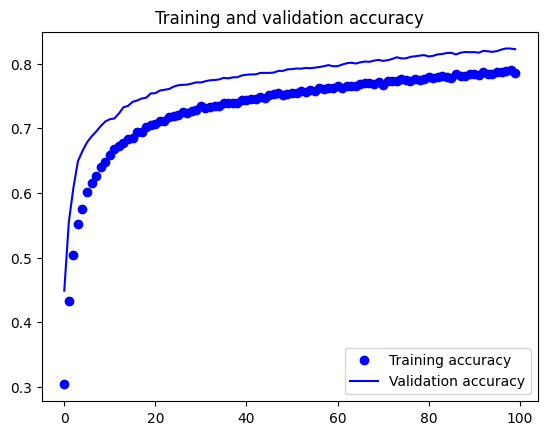

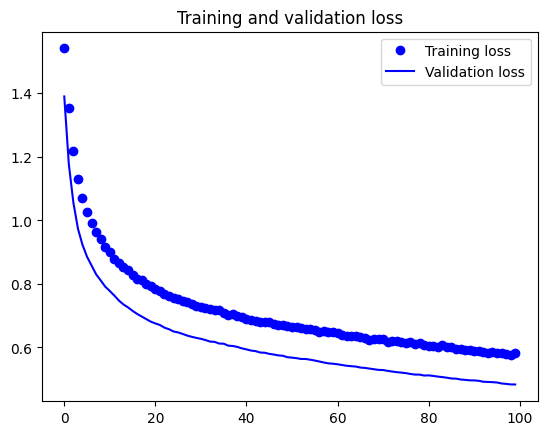

In [291]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [292]:
predicted_classes2 = sport_model.predict(test_X)

328/328 [==============================] - 0s 1ms/step


In [293]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [294]:
predicted_classes.shape, test_Y.shape

((10494,), (10494,))

# Aprendamos de los errores: Qué mejorar

Found 8705 correct labels


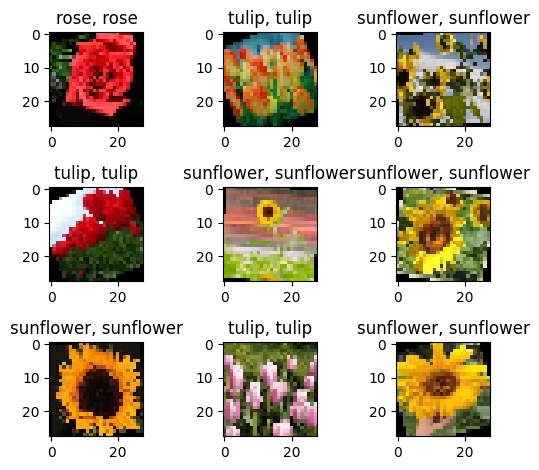

In [295]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 1789 incorrect labels


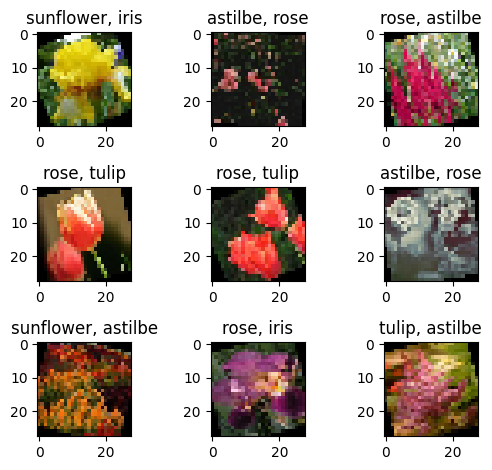

In [296]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [297]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.75      0.77      1594
     Class 1       0.91      0.90      0.91      2110
     Class 2       0.77      0.74      0.75      2211
     Class 3       0.90      0.96      0.93      2314
     Class 4       0.77      0.78      0.78      2265

    accuracy                           0.83     10494
   macro avg       0.83      0.83      0.83     10494
weighted avg       0.83      0.83      0.83     10494

